# Importing dataset

In [22]:
! git clone https://github.com/AnjulaMehto/Sampling_DataSet.git

fatal: destination path 'Sampling_DataSet' already exists and is not an empty directory.


In [37]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [48]:
import pandas as pd
from pycaret.classification import *

# Replace the 'url' variable with the raw URL of your dataset on GitHub
url = "Sampling_DataSet/Creditcard_data.csv"
dataset = pd.read_csv(url)

In [51]:
print(dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Checking Balance of Dataset

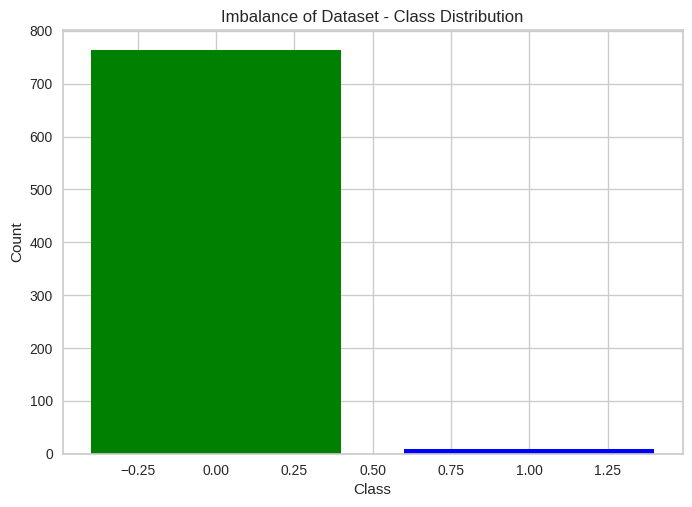

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

class_counts = dataset['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Imbalance of Dataset - Class Distribution')
plt.show()

In [59]:
# Calculating imbalance ratio
imbalance_ratio = min(class_counts) / max(class_counts)
print(f"Imbalance Ratio: {imbalance_ratio}")

# Calculating Gini coefficient
total_samples = len(df)
class_proportions = class_counts / total_samples
gini_coefficient = 1 - np.sum(class_proportions**2)
print(f'Gini Coefficient: {gini_coefficient}')

Imbalance Ratio: 0.011795543905635648
Gini Coefficient: 0.02304424279846451


# Balancing the Dataset

In [60]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


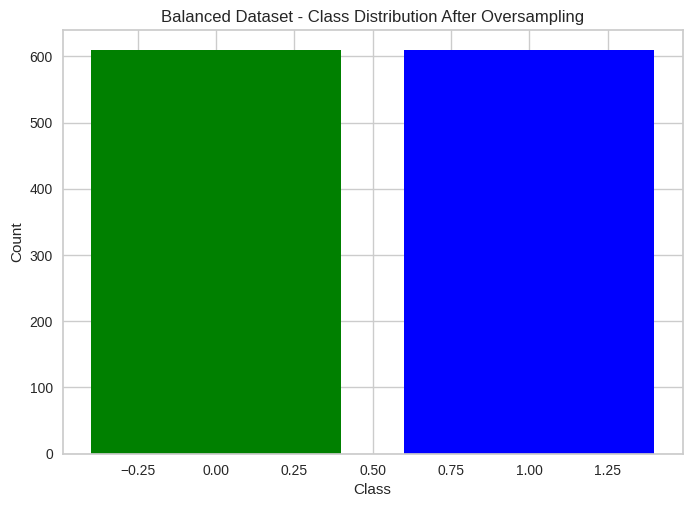

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = dataset

# Assuming the target variable is named 'Class'
# Replace 'Class' with the actual name of your target variable
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plotting the bar graph for the resampled dataset
class_counts_resampled = pd.Series(y_resampled).value_counts()
plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=['green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Dataset - Class Distribution After Oversampling')
plt.show()

In [89]:
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Class'] = y_resampled

# Training the models

In [90]:
# 1. Simple Random Sampling

# Sample size n = (Z^2 * p * (1-p)/E^2)
n_simple_random = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / 0.05**2))
class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_simple_random = min(n_simple_random, class_size)

sample_simple_random = balanced_df.sample(n=n_simple_random, random_state=42)

print("Sample Size for Simple Random Sampling:", sample_simple_random.shape[0])
print(sample_simple_random['Class'].value_counts())

Sample Size for Simple Random Sampling: 385
0    204
1    181
Name: Class, dtype: int64


In [91]:
# 2. Stratified Sampling

#  Sample size n = (Z**2 * p * (1 - p)) / (E/S)**2)
#S is no of strata, S=2 bcz of the two classes, p = Estimated proportion
p = 0.5
n_stratified = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / (0.05/2)**2))

class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_stratified = min(n_stratified, class_size)

sample_stratified = pd.DataFrame()
for class_label in balanced_df['Class'].unique():
    class_samples = balanced_df[balanced_df['Class'] == class_label]
    sample_size_per_class = int(np.ceil((len(class_samples) / len(balanced_df)) * n_stratified))
    class_sample = class_samples.sample(n=sample_size_per_class, random_state=42)
    sample_stratified = pd.concat([sample_stratified, class_sample])

print("Sample Size for Stratified Sampling:", sample_stratified.shape[0])
print(sample_stratified['Class'].value_counts())

Sample Size for Stratified Sampling: 610
0    305
1    305
Name: Class, dtype: int64


In [92]:
# 3. Cluster Sampling

# Sample size n = (Z**2 * p * (1 - p)) / (E / C)**2
#Here, C = avg size of cluster
C = 50
Z=1.96
p=0.5
E=0.05
n_cluster = int(np.ceil((Z**2 * p * (1 - p)) / (E / C)**2))

class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_cluster = min(n_cluster, class_size)

sample_cluster = pd.DataFrame()
cluster_indices = np.array_split(balanced_df.index, n_cluster)
for cluster_index in cluster_indices:
    cluster_sample = balanced_df.loc[cluster_index].sample(random_state=42)
    sample_cluster = pd.concat([sample_cluster, cluster_sample])

print("Sample Size for Cluster Sampling:", sample_cluster.shape[0])
print(sample_cluster['Class'].value_counts())

Sample Size for Cluster Sampling: 609
1    308
0    301
Name: Class, dtype: int64


In [93]:
# 4. Systematic Sampling

k = len(balanced_df) // 1000
n_systematic = len(balanced_df) // k
sample_systematic = balanced_df.iloc[::k]

print("Sample Size for Systematic Sampling:", sample_systematic.shape[0])
print(sample_systematic['Class'].value_counts())

Sample Size for Systematic Sampling: 1218
0    609
1    609
Name: Class, dtype: int64


In [96]:
# 5. Boostrap Sampling
import numpy as np
from sklearn.utils import resample

np.random.seed(50)
n_bootstrap = len(balanced_df)
sample_bootstrap = resample(balanced_df, replace=True, n_samples=n_bootstrap, random_state=42)
print("Sample Size for Bootstrap Sampling:", sample_bootstrap.shape[0])
print(sample_bootstrap['Class'].value_counts())

Sample Size for Bootstrap Sampling: 1218
1    663
0    555
Name: Class, dtype: int64


# Finding Accuracies for each model and each method

In [97]:
# Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## Simple Random
decision_tree = DecisionTreeClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_simplerandom = decision_tree.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with Decision Tree:", accuracy_simple_random_test)

## Stratified Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_stratified = decision_tree.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with Decision Tree:", accuracy_stratified_test)

## Boostrap Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_bootstrap = decision_tree.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with Decision Tree:", accuracy_bootstrap_test)

## Systematic Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_systematic = decision_tree.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with Decision Tree:", accuracy_systematic_test)

## Cluster Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_cluster = decision_tree.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with Decision Tree:", accuracy_cluster_test)

model1 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with Decision Tree: 0.9090909090909091
Accuracy for Stratified Sampling with Decision Tree: 0.930327868852459
Accuracy for Bootstrap Sampling with Decision Tree: 0.9795081967213115
Accuracy for Systematic Sampling with Decision Tree: 0.9508196721311475
Accuracy for Cluster Sampling with Decision Tree: 0.9508196721311475


In [98]:
# Random Forest Classifier

## Simple Random
random_forest = RandomForestClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_simplerandom = random_forest.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with Random Forest:", accuracy_simple_random_test)

## Stratified Sampling
random_forest = RandomForestClassifier(random_state=42)
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_stratified = random_forest.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with Random Forest:", accuracy_stratified_test)

## Boostrap Sampling
random_forest = RandomForestClassifier(random_state=42)
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_bootstrap = random_forest.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with Random Forest:", accuracy_bootstrap_test)

## Systematic Sampling
random_forest = RandomForestClassifier(random_state=42)
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_systematic = random_forest.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with Random Forest:", accuracy_systematic_test)

## Cluster Sampling
random_forest = RandomForestClassifier(random_state=42)
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_cluster = random_forest.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with Random Forest:", accuracy_cluster_test)

model2 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with Random Forest: 0.9935064935064936
Accuracy for Stratified Sampling with Random Forest: 0.9836065573770492
Accuracy for Bootstrap Sampling with Random Forest: 1.0
Accuracy for Systematic Sampling with Random Forest: 0.9979508196721312
Accuracy for Cluster Sampling with Random Forest: 0.9959016393442623


In [99]:
# SVM
svm=SVC(kernel='linear')
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_simplerandom = svm.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with SVM:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_stratified = svm.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with SVM:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_bootstrap = svm.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with SVM:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_systematic = svm.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with SVM:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_cluster = svm.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with SVM:", accuracy_cluster_test)

model3 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with SVM: 0.8636363636363636
Accuracy for Stratified Sampling with SVM: 0.9221311475409836
Accuracy for Bootstrap Sampling with SVM: 0.9487704918032787
Accuracy for Systematic Sampling with SVM: 0.9262295081967213
Accuracy for Cluster Sampling with SVM: 0.8852459016393442


In [100]:
# K- Nearest Neighbour
knn=KNeighborsClassifier(n_neighbors=5)
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_simplerandom = knn.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with K- Nearest Neighbour:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_stratified = knn.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with K- Nearest Neighbour:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_bootstrap = knn.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with K- Nearest Neighbour:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_systematic = knn.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with K- Nearest Neighbour:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_cluster = knn.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with K- Nearest Neighbour:", accuracy_cluster_test)

model4 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with K- Nearest Neighbour: 0.7142857142857143
Accuracy for Stratified Sampling with K- Nearest Neighbour: 0.7418032786885246
Accuracy for Bootstrap Sampling with K- Nearest Neighbour: 0.8565573770491803
Accuracy for Systematic Sampling with K- Nearest Neighbour: 0.7868852459016393
Accuracy for Cluster Sampling with K- Nearest Neighbour: 0.7131147540983607


In [101]:
# XGBoost Classifier
xgb=XGBClassifier()
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_simplerandom = xgb.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with XGBoost:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_stratified = xgb.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with XGBoost:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_bootstrap = xgb.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with XGBoost:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_systematic = xgb.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with XGBoost:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_cluster = xgb.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with XGBoost:", accuracy_cluster_test)

model5 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with XGBoost: 0.9805194805194806
Accuracy for Stratified Sampling with XGBoost: 0.9754098360655737
Accuracy for Bootstrap Sampling with XGBoost: 0.9918032786885246
Accuracy for Systematic Sampling with XGBoost: 0.9897540983606558
Accuracy for Cluster Sampling with XGBoost: 0.9754098360655737


# Results

In [102]:
models = ["Decision Tree","Random Forest","SVM","KNN","XGBoost"]


Sampling=["Simple Random Sampling", "Stratified Sampling", "Bootstrap Sampling", "Systematic Sampling", "Cluster Sampling"]


final_table = pd.DataFrame()
final_table['Sampling Technique -> // Model ↓'] = models
final_table['Decision Tree'] = model1
final_table['Random Forest'] = model2
final_table['SVM'] = model3
final_table['KNN'] = model4
final_table['XGBoost'] = model5
final_table.transpose()

,0,1,2,3,4
Sampling Technique -> // Model ↓,Decision Tree,Random Forest,SVM,KNN,XGBoost
Decision Tree,90.909091,93.032787,97.95082,95.081967,95.081967
Random Forest,99.350649,98.360656,100.0,99.795082,99.590164
SVM,86.363636,92.213115,94.877049,92.622951,88.52459
KNN,71.428571,74.180328,85.655738,78.688525,71.311475
XGBoost,98.051948,97.540984,99.180328,98.97541,97.540984


In [111]:
# Find the best accuracy for each sampling technique
best_accuracies = final_table.max(axis=1)

# Create a new DataFrame to store the results
best_results = pd.DataFrame({'Sampling Technique': best_accuracies.index, 'Accuracy': best_accuracies.values})

# Find the corresponding best model for each sampling technique
best_models = []
for index, row in best_results.iterrows():
    sampling_technique = row['Sampling Technique']
    best_accuracy = row['Accuracy']
    best_model = final_table.loc[sampling_technique][final_table.loc[sampling_technique] == best_accuracy].index[0]
    best_models.append(best_model)

# Add the 'Best Model' column to the results DataFrame
best_results['Best Model'] = best_models

# Display the final results
print(best_results)


   Sampling Technique    Accuracy     Best Model
0                   0   99.350649  Random Forest
1                   1   98.360656  Random Forest
2                   2  100.000000  Random Forest
3                   3   99.795082  Random Forest
4                   4   99.590164  Random Forest
